In [4]:
# import warnings
# warnings.filterwarnings("ignore")

from carla.data.catalog import CsvCatalog
from carla import MLModelCatalog
from carla.recourse_methods import Clue, Wachter
from carla.models.negative_instances import predict_negative_instances
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'../..')
from recourse_analysis.util.recourse_util import update_dataset, train_recourse_method

num = 10

In [5]:
def find_elbow(dataset, n=10):
    ch_metrics = []
    x = dataset.df[dataset.continuous]
    
    for i in range(2, n):
        model = KMeans(n_clusters=i, random_state=1).fit(x)
        ch_metrics.append(metrics.calinski_harabasz_score(x, model.labels_))
        
    plt.plot(ch_metrics)
    plt.show()
        
    return ch_metrics.index(np.max(ch_metrics)) + 2

In [14]:
dataset = CsvCatalog(
    file_path='datasets/skewed_distribution.csv',
    categorical=[],
    continuous=['feature1', 'feature2'],
    immutables=[],
    target='target'
)

In [15]:
distortions = []

In [16]:
for i in range(1, 10):
    kmeans = KMeans(i).fit(dataset._df[dataset.continuous])
    distortions.append(kmeans.inertia_)

In [17]:
delta = [distortions[n] - distortions[n+1] for n in range(len(distortions) - 1)]
delta_delta = [delta[n] - delta[n+1] for n in range(len(delta) - 1)]

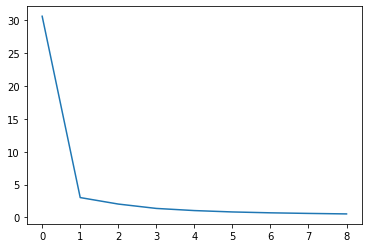

In [18]:
plt.plot(distortions)
plt.show()

In [19]:
delta_delta = delta_delta/np.max(delta_delta)

In [20]:
delta_delta

array([1.00000000e+00, 1.20542595e-02, 1.27529245e-02, 4.41159398e-03,
       2.87158059e-03, 1.56677799e-03, 5.65913367e-04])

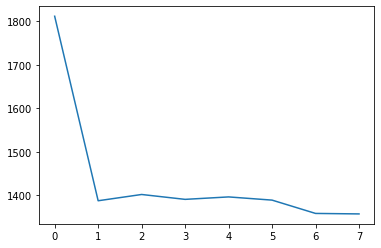

2

In [21]:
find_elbow(dataset)